In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load and read files
mouse_drug_data = pd.read_csv("./Resources/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("./Resources/clinicaltrial_data.csv")
#mouse_drug_data = mouse_drug_data['Mouse ID'].drop_duplicates()


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on='Mouse ID', how='left')
#combined_data = combined_data['Mouse ID'].drop_duplicates()

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [64]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
mean_tumor_vol = grouped_data.mean()
# mean_tumor_vol.head()

# Convert to DataFrame
tumor_vol_df = pd.DataFrame(mean_tumor_vol).reset_index()

# # Preview DataFrame
tumor_vol_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [65]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = grouped_data.sem()

# Convert to DataFrame
std_error_df = pd.DataFrame(std_error)
std_error_df.reset_index(inplace=True)

# Preview DataFrame
std_error_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [67]:
 # Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
    
# Preview that Reformatting worked
mean_tumor_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


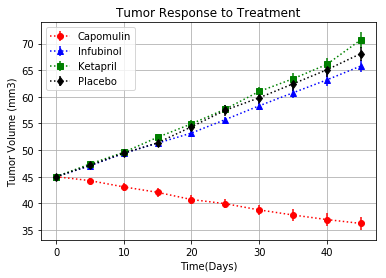

In [68]:
 # Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_pivot.index, mean_tumor_vol['Capomulin'], yerr=std_error_pivot['Capomulin'], fmt='ro:')
plt.errorbar(mean_tumor_pivot.index, mean_tumor_vol['Infubinol'], yerr=std_error_pivot['Infubinol'], fmt='b^:')
plt.errorbar(mean_tumor_pivot.index, mean_tumor_vol['Ketapril'], yerr=std_error_pivot['Ketapril'], fmt='gs:')
plt.errorbar(mean_tumor_pivot.index, mean_tumor_vol['Placebo'], yerr=std_error_pivot['Placebo'], fmt='kd:')

plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best', labels=('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'), fancybox=True)
plt.grid()

# Save the Figure
plt.savefig('./Resources/tumor_response.png')

In [25]:
 # Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_site = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
mean_met_site = grouped_met_site.mean()
# mean_met_site.head(10)
    
# Convert to DataFrame
met_site_df = pd.DataFrame(mean_met_site)
met_site_df.reset_index(inplace=True)

# # Preview DataFrame
met_site_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [34]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_std_error = grouped_met_site.sem()
met_site_std_error.head(10)

# Convert to DataFrame
met_site_std_error_df = pd.DataFrame(met_site_std_error)
met_site_std_error_df.reset_index(inplace=True)

# Preview DataFrame
met_site_std_error_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [88]:
# Minor Data Munging to Re-Format the Data Frames
met_site_pivot = met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_site_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


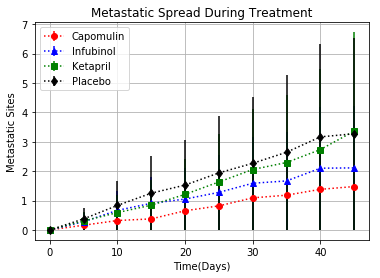

In [89]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_site_pivot.index, mean_met_site['Capomulin'], yerr=met_site_pivot['Capomulin'], fmt='ro:')
plt.errorbar(met_site_pivot.index, mean_met_site['Infubinol'], yerr=met_site_pivot['Infubinol'], fmt='b^:')
plt.errorbar(met_site_pivot.index, mean_met_site['Ketapril'], yerr=met_site_pivot['Ketapril'], fmt='gs:')
plt.errorbar(met_site_pivot.index, mean_met_site['Placebo'], yerr=met_site_pivot['Placebo'], fmt='kd:')

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='upper left', labels=('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'), fancybox=True)
plt.grid()

# Save the Figure
plt.savefig('./Resources/metastatic_spread.png')

In [51]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mouse_count = combined_data.groupby(['Drug', 'Timepoint']).nunique()['Mouse ID']
# grouped_mouse_count.head(10)
    
# Convert to DataFrame
mouse_count_df = pd.DataFrame(grouped_mouse_count)
mouse_count_df.reset_index(inplace=True)
mouse_count_df = mouse_count_df.rename(columns={'Mouse ID': 'Mouse Count'})

# # Preview DataFrame
mouse_count_df.head(10)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [53]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
mouse_count_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


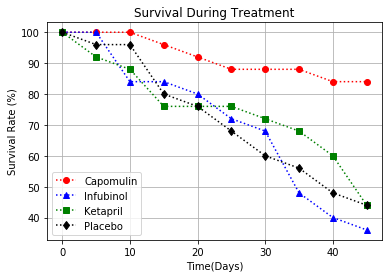

In [60]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouse_count_pivot['Capomulin'] / 25, 'ro', linestyle=':')
plt.plot(100 * mouse_count_pivot['Infubinol'] / 25, 'b^', linestyle=':')
plt.plot(100 * mouse_count_pivot['Ketapril'] / 25, 'gs', linestyle=':')
plt.plot(100 * mouse_count_pivot['Placebo'] / 25, 'kd', linestyle=':')

plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='best', labels=('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'), fancybox=True)
plt.grid()

# Save the Figure
plt.savefig('./Resources/survival_rate.png')



In [125]:
# Calculate the percent changes for each drug
percent_change = (mean_tumor_pivot.iloc[-1]/mean_tumor_pivot.iloc[0]-1) * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

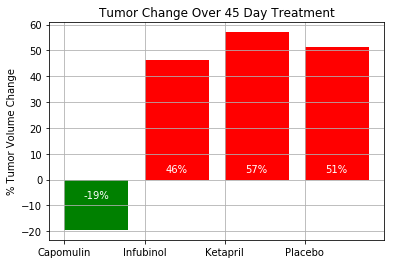

In [130]:
# Store all Relevant Percent Changes into a Tuple
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
passing = percent_change < 0

# Splice the data between passing and failing drugs
change_list = [(percent_change[drug]) for drug in drug_list]
change_drug_plt = plt.bar(drug_list, change_list, align='edge', color=passing.map({True:'g', False:'r'}))

# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid()

# Use functions to label the percentages of changes
def autolabel (bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(bar.get_x() + bar.get_width()/2., label_position, '%d%%' % int(height), color='white', 
                 ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(change_drug_plt)

# Save the Figure
plt.savefig('./Resources/tumor_change.png')

# Show the Figure
plt.show()